# Customer Segmentation and Market  Basket Analysis
![image](http://denary.wpengine.com/wp-content/uploads/2014/07/picture_market_segmentation-10-4-13-resized-600.png)
__Introduction__:
This notebook we using publicly dataset On-line Retail to explore customer segmentation through the interesting task  of unsupervised learning method. Then we go further and apply association rule mining approach to find interesting rules and patterns in this transaction database. These customer segmentation, rules and patterns can be used to make interesting and useful decisions as far as user interest is concerned. 

The [Online Retail](https://archive.ics.uci.edu/ml/datasets/Online+Retail#) a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

But first, let's see some deep understand of both concepts:

* Customer segmentation: Customer segmentation is the problem of uncovering information about a firm's customer base, based on their interactions with the business. In most cases this interaction is in terms of their purchase behavior and patterns. We explore some of the ways in which this can be used.
* Market basket analysis: Market basket analysis is a method to gain insights into granular behavior of customers. This is helpful in devising strategies which uncovers deeper understanding of purchase decisions taken by the customers. This is interesting as a lot of times even the customer will be unaware of such biases or trends in their purchasing behavior.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-Dependencies-and-Configuration-Settings" data-toc-modified-id="Load-Dependencies-and-Configuration-Settings-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load Dependencies and Configuration Settings</a></span></li><li><span><a href="#Load-Dataset" data-toc-modified-id="Load-Dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load Dataset</a></span></li><li><span><a href="#Exploratory-Data-Analysis-(EDA)" data-toc-modified-id="Exploratory-Data-Analysis-(EDA)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exploratory Data Analysis (EDA)</a></span><ul class="toc-item"><li><span><a href="#Take-a-First-Look-of-our-Data:" data-toc-modified-id="Take-a-First-Look-of-our-Data:-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Take a First Look of our Data:</a></span></li></ul></li><li><span><a href="#Customer-Segmentation:" data-toc-modified-id="Customer-Segmentation:-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Customer Segmentation:</a></span><ul class="toc-item"><li><span><a href="#RFM-Model-for-Customer-Value:" data-toc-modified-id="RFM-Model-for-Customer-Value:-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>RFM Model for Customer Value:</a></span><ul class="toc-item"><li><span><a href="#Recency" data-toc-modified-id="Recency-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Recency</a></span></li><li><span><a href="#Frequency" data-toc-modified-id="Frequency-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Frequency</a></span></li><li><span><a href="#Monetary-Value" data-toc-modified-id="Monetary-Value-4.1.3"><span class="toc-item-num">4.1.3&nbsp;&nbsp;</span>Monetary Value</a></span></li></ul></li><li><span><a href="#Data-Preprocessing" data-toc-modified-id="Data-Preprocessing-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Data Preprocessing</a></span></li><li><span><a href="#Clustering-for-Segments" data-toc-modified-id="Clustering-for-Segments-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Clustering for Segments</a></span><ul class="toc-item"><li><span><a href="#K-Means-Clustering" data-toc-modified-id="K-Means-Clustering-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>K-Means Clustering</a></span><ul class="toc-item"><li><span><a href="#K-means++" data-toc-modified-id="K-means++-4.3.1.1"><span class="toc-item-num">4.3.1.1&nbsp;&nbsp;</span>K-means++</a></span></li></ul></li><li><span><a href="#The-Elbow-Method" data-toc-modified-id="The-Elbow-Method-4.3.2"><span class="toc-item-num">4.3.2&nbsp;&nbsp;</span>The Elbow Method</a></span></li><li><span><a href="#Silhouette-analysis-on-K-Means-clustering" data-toc-modified-id="Silhouette-analysis-on-K-Means-clustering-4.3.3"><span class="toc-item-num">4.3.3&nbsp;&nbsp;</span>Silhouette analysis on K-Means clustering</a></span></li><li><span><a href="#Clusters-Center:" data-toc-modified-id="Clusters-Center:-4.3.4"><span class="toc-item-num">4.3.4&nbsp;&nbsp;</span>Clusters Center:</a></span></li><li><span><a href="#Clusters-Insights:" data-toc-modified-id="Clusters-Insights:-4.3.5"><span class="toc-item-num">4.3.5&nbsp;&nbsp;</span>Clusters Insights:</a></span></li><li><span><a href="#Drill-Down-Clusters:" data-toc-modified-id="Drill-Down-Clusters:-4.3.6"><span class="toc-item-num">4.3.6&nbsp;&nbsp;</span>Drill Down Clusters:</a></span></li></ul></li><li><span><a href="#Next-Steps-in-the-Segmentation:" data-toc-modified-id="Next-Steps-in-the-Segmentation:-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Next Steps in the Segmentation:</a></span></li></ul></li><li><span><a href="#Cross-Selling" data-toc-modified-id="Cross-Selling-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Cross Selling</a></span><ul class="toc-item"><li><span><a href="#Market-Basket-Analysis-with-Association-Rule-Mining" data-toc-modified-id="Market-Basket-Analysis-with-Association-Rule-Mining-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Market Basket Analysis with Association Rule-Mining</a></span><ul class="toc-item"><li><span><a href="#Algorithms:" data-toc-modified-id="Algorithms:-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>Algorithms:</a></span><ul class="toc-item"><li><span><a href="#Apriori" data-toc-modified-id="Apriori-5.1.1.1"><span class="toc-item-num">5.1.1.1&nbsp;&nbsp;</span>Apriori</a></span></li><li><span><a href="#Eclat-algorithm" data-toc-modified-id="Eclat-algorithm-5.1.1.2"><span class="toc-item-num">5.1.1.2&nbsp;&nbsp;</span>Eclat algorithm</a></span></li><li><span><a href="#FP-Growth" data-toc-modified-id="FP-Growth-5.1.1.3"><span class="toc-item-num">5.1.1.3&nbsp;&nbsp;</span>FP Growth</a></span></li></ul></li><li><span><a href="#Build-Transaction-Dataset" data-toc-modified-id="Build-Transaction-Dataset-5.1.2"><span class="toc-item-num">5.1.2&nbsp;&nbsp;</span>Build Transaction Dataset</a></span></li><li><span><a href="#Prune-Dataset-for-frequently-purchased-items" data-toc-modified-id="Prune-Dataset-for-frequently-purchased-items-5.1.3"><span class="toc-item-num">5.1.3&nbsp;&nbsp;</span>Prune Dataset for frequently purchased items</a></span></li><li><span><a href="#Association-Rule-Mining-with-FP-Growth" data-toc-modified-id="Association-Rule-Mining-with-FP-Growth-5.1.4"><span class="toc-item-num">5.1.4&nbsp;&nbsp;</span>Association Rule Mining with FP Growth</a></span><ul class="toc-item"><li><span><a href="#Orange-Table-Data-Structure" data-toc-modified-id="Orange-Table-Data-Structure-5.1.4.1"><span class="toc-item-num">5.1.4.1&nbsp;&nbsp;</span>Orange Table Data Structure</a></span></li><li><span><a href="#Creating-our-rules" data-toc-modified-id="Creating-our-rules-5.1.4.2"><span class="toc-item-num">5.1.4.2&nbsp;&nbsp;</span>Creating our rules</a></span></li><li><span><a href="#Explore-The-Association-Rule-Created" data-toc-modified-id="Explore-The-Association-Rule-Created-5.1.4.3"><span class="toc-item-num">5.1.4.3&nbsp;&nbsp;</span>Explore The Association Rule Created</a></span></li></ul></li></ul></li></ul></li></ul></div>

## Load Dependencies and Configuration Settings

We started with the installation of the orange3 package through the command line, since it is not possible to include it through the usual procedure of adding custom packages in the Kernel.

In [1]:
import os
import warnings
warnings.simplefilter(action = 'ignore', category=FutureWarning)
warnings.filterwarnings('ignore')
def ignore_warn(*args, **kwargs):
    pass

warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)

import pandas as pd
import datetime
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib.cm as cm

%matplotlib inline

from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

import seaborn as sns
sns.set(style="ticks", color_codes=True, font_scale=1.5)
color = sns.color_palette()
sns.set_style('darkgrid')

from mpl_toolkits.mplot3d import Axes3D

import plotly as py
import plotly.graph_objs as go
py.offline.init_notebook_mode()

from scipy import stats
from scipy.stats import skew, norm, probplot, boxcox
from sklearn import preprocessing
import math

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score


## Load Dataset

In [2]:
cs_df = pd.read_excel(io=r'../input/Online Retail.xlsx')

## Exploratory Data Analysis (EDA)
![image](http://visualoop.com/media/2013/09/Dilbert-680x490.png)
### Take a First Look of our Data:
I created the function below to simplify the analysis of general characteristics of the data. Inspired on the str function of R, this function returns the types, counts, distinct, count nulls, missing ratio and uniques values of each field/feature.

If the study involve some supervised learning, this function can return the study of the correlation, for this we just need provide the dependent variable to the pred parameter.

Also, if its return is stored in a variable you can evaluate it in more detail, focus on specific field, or sort them from different perspectives.

In [3]:
def rstr(df, pred=None): 
    obs = df.shape[0]
    types = df.dtypes
    counts = df.apply(lambda x: x.count())
    uniques = df.apply(lambda x: [x.unique()])
    nulls = df.apply(lambda x: x.isnull().sum())
    distincts = df.apply(lambda x: x.unique().shape[0])
    missing_ration = (df.isnull().sum()/ obs) * 100
    skewness = df.skew()
    kurtosis = df.kurt() 
    print('Data shape:', df.shape)
    
    if pred is None:
        cols = ['types', 'counts', 'distincts', 'nulls', 'missing ration', 'uniques', 'skewness', 'kurtosis']
        str = pd.concat([types, counts, distincts, nulls, missing_ration, uniques, skewness, kurtosis], axis = 1, sort=True)

    else:
        corr = df.corr()[pred]
        str = pd.concat([types, counts, distincts, nulls, missing_ration, uniques, skewness, kurtosis, corr], axis = 1, sort=True)
        corr_col = 'corr '  + pred
        cols = ['types', 'counts', 'distincts', 'nulls', 'missing ration', 'uniques', 'skewness', 'kurtosis', corr_col ]
    
    str.columns = cols
    dtypes = str.types.value_counts()
    print('___________________________\nData types:\n',str.types.value_counts())
    print('___________________________')
    return str

details = rstr(cs_df)
display(details.sort_values(by='missing ration', ascending=False))

Data shape: (541909, 8)
___________________________
Data types:
 object            4
float64           2
datetime64[ns]    1
int64             1
Name: types, dtype: int64
___________________________


types  counts      ...          skewness       kurtosis
CustomerID          float64  406829      ...          0.029835      -1.179982
Description          object  540455      ...               NaN            NaN
Country              object  541909      ...               NaN            NaN
InvoiceDate  datetime64[ns]  541909      ...               NaN            NaN
InvoiceNo            object  541909      ...               NaN            NaN
Quantity              int64  541909      ...         -0.264076  119769.160031
StockCode            object  541909      ...               NaN            NaN
UnitPrice           float64  541909      ...        186.506972   59005.719097

[8 rows x 8 columns]

Let's see the description of each column:
* **InvoiceNo**: A unique identifier for the invoice. An invoice number shared across rows means that those transactions were performed in a single invoice (multiple purchases).
* **StockCode**: Identifier for items contained in an invoice.
* **Description**: Textual description of each of the stock item.
* **Quantity**: The quantity of the item purchased.
* **InvoiceDate**: Date of purchase.
* **UnitPrice**: Value of each item.
* **CustomerID**: Identifier for customer making the purchase.
* **Country**: Country of customer.

In [4]:
cs_df.describe()

Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000

We can observe from the preceding output that Quantity and UnitPrice are having negative values, which may mean that we may have some return transactions in our data also. 
As our goal is customer segmentation and market basket analysis, it is important that these records are removed, but first we will take a look at whether there are records where both are negative or if one of them is negative and the other is zero.

In [5]:
print('Check if we had negative quantity and prices at same register:',
     'No' if cs_df[(cs_df.Quantity<0) & (cs_df.UnitPrice<0)].shape[0] == 0 else 'Yes', '\n')
print('Check how many register we have where quantity is negative',
      'and prices is 0 or vice-versa:',
      cs_df[(cs_df.Quantity<=0) & (cs_df.UnitPrice<=0)].shape[0])
print('\nWhat is the customer ID of the registers above:',
      cs_df.loc[(cs_df.Quantity<=0) & (cs_df.UnitPrice<=0), 
                ['CustomerID']].CustomerID.unique())
print('\n% Negative Quantity: {:3.2%}'.format(cs_df[(cs_df.Quantity<0)].shape[0]/cs_df.shape[0]))
print('\nAll register with negative quantity has Invoice start with:', 
      cs_df.loc[(cs_df.Quantity<0) & ~(cs_df.CustomerID.isnull()), 'InvoiceNo'].apply(lambda x: x[0]).unique())
print('\nSee an example of negative quantity and others related records:')
display(cs_df[(cs_df.CustomerID==12472) & (cs_df.StockCode==22244)])

Check if we had negative quantity and prices at same register: No 

Check how many register we have where quantity is negative and prices is 0 or vice-versa: 1336

What is the customer ID of the registers above: [nan]

% Negative Quantity: 1.96%

All register with negative quantity has Invoice start with: ['C']

See an example of negative quantity and others related records:


InvoiceNo StockCode   ...    CustomerID  Country
1973     C536548     22244   ...       12472.0  Germany
9438      537201     22244   ...       12472.0  Germany
121980    546843     22244   ...       12472.0  Germany

[3 rows x 8 columns]

In [6]:
print('Check register with UnitPrice negative:')
display(cs_df[(cs_df.UnitPrice<0)])
print("Sales records with Customer ID and zero in Unit Price:",cs_df[(cs_df.UnitPrice==0)  & ~(cs_df.CustomerID.isnull())].shape[0])
cs_df[(cs_df.UnitPrice==0)  & ~(cs_df.CustomerID.isnull())]

Check register with UnitPrice negative:


InvoiceNo StockCode       ...       CustomerID         Country
299983   A563186         B       ...              NaN  United Kingdom
299984   A563187         B       ...              NaN  United Kingdom

[2 rows x 8 columns]

Sales records with Customer ID and zero in Unit Price: 40


InvoiceNo StockCode       ...       CustomerID         Country
9302      537197     22841       ...          12647.0         Germany
33576     539263     22580       ...          16560.0  United Kingdom
40089     539722     22423       ...          14911.0            EIRE
47068     540372     22090       ...          13081.0  United Kingdom
47070     540372     22553       ...          13081.0  United Kingdom
56674     541109     22168       ...          15107.0  United Kingdom
86789     543599    84535B       ...          17560.0  United Kingdom
130188    547417     22062       ...          13239.0  United Kingdom
139453    548318     22055       ...          13113.0  United Kingdom
145208    548871     22162       ...          14410.0  United Kingdom
157042    550188     22636       ...          12457.0     Switzerland
187613    553000     47566       ...          17667.0  United Kingdom
198383    554037     22619       ...          12415.0       Australia
279324    561284     22167       ...          16818.0  United Kingdom
282912    561669     22960       ...          12507.0           Spain
285657    561916         M       ...          15581.0  United Kingdom
298054    562973     23157       ...          14911.0            EIRE
314745    564651     23270       ...          14646.0     Netherlands
314746    564651     23268       ...          14646.0     Netherlands
314747    564651     22955       ...          14646.0     Netherlands
314748    564651     21786       ...          14646.0     Netherlands
358655    568158      PADS       ...          16133.0  United Kingdom
361825    568384         M       ...          12748.0  United Kingdom
379913    569716     22778       ...          15804.0  United Kingdom
395529    571035         M       ...          12446.0             RSA
420404    572893     21208       ...          18059.0  United Kingdom
436428    574138     23234       ...          12415.0       Australia
436597    574175     22065       ...          14110.0  United Kingdom
436961    574252         M       ...          12437.0          France
439361    574469     22385       ...          12431.0       Australia
446125    574879     22625       ...          13014.0  United Kingdom
446793    574920     22899       ...          13985.0  United Kingdom
446794    574920     23480       ...          13985.0  United Kingdom
454463    575579     22437       ...          13081.0  United Kingdom
454464    575579     22089       ...          13081.0  United Kingdom
479079    577129     22464       ...          15602.0  United Kingdom
479546    577168         M       ...          12603.0         Germany
480649    577314     23407       ...          12444.0          Norway
485985    577696         M       ...          16406.0  United Kingdom
502122    578841     84826       ...          13256.0  United Kingdom

[40 rows x 8 columns]

As you can see, there are no records where quantity and price are negative, but there are 1.336 records where one of them is and the other is 0. However, note that for all these records we do not have the customer ID. So we conclude that we can erase all records in that quantity or the price and negative. In addition, by the foregoing summary we see that there are 135,080 records without customer identification that we may also disregard.

In [7]:
# Remove register withou CustomerID
cs_df = cs_df[~(cs_df.CustomerID.isnull())]

# Remove negative or return transactions
cs_df = cs_df[~(cs_df.Quantity<0)]
cs_df = cs_df[cs_df.UnitPrice>0]

details = rstr(cs_df)
display(details.sort_values(by='distincts', ascending=False))

Data shape: (397884, 8)
___________________________
Data types:
 object            4
float64           2
datetime64[ns]    1
int64             1
Name: types, dtype: int64
___________________________


types  counts      ...          skewness       kurtosis
InvoiceNo            object  397884      ...         -0.178524      -1.200748
InvoiceDate  datetime64[ns]  397884      ...               NaN            NaN
CustomerID          float64  397884      ...          0.025729      -1.180822
Description          object  397884      ...               NaN            NaN
StockCode            object  397884      ...               NaN            NaN
UnitPrice           float64  397884      ...        204.032727   58140.396673
Quantity              int64  397884      ...        409.892972  178186.243253
Country              object  397884      ...               NaN            NaN

[8 rows x 8 columns]


After this first cleanup, note that we still have more description than inventory codes, so we still have some inconsistency on the basis that requires further investigation. Let´s see it:

In [8]:
cat_des_df = cs_df.groupby(["StockCode","Description"]).count().reset_index()
display(cat_des_df.StockCode.value_counts()[cat_des_df.StockCode.value_counts()>1].reset_index().head())
cs_df[cs_df['StockCode'] == cat_des_df.StockCode.value_counts()[cat_des_df.StockCode.value_counts()>1]
      .reset_index()['index'][4]]['Description'].unique()

index  StockCode
0  23236          4
1  23196          4
2  23231          3
3  23370          3
4  23413          3

array(['VINTAGE COFFEE GRINDER BOX',
       'DECROTIVEVINTAGE COFFEE GRINDER BOX',
       'DECORATIVE VINTAGE COFFEE  BOX'], dtype=object)

This gives the multiple descriptions for one of those items and we witness the simple ways in which data quality can be corrupted in any dataset. A simple spelling mistake can end up in reducing data quality and an erroneous analysis.

In [9]:
unique_desc = cs_df[["StockCode", "Description"]].groupby(by=["StockCode"]).\
                apply(pd.DataFrame.mode).reset_index(drop=True)
q = '''
select df.InvoiceNo, df.StockCode, un.Description, df.Quantity, df.InvoiceDate,
       df.UnitPrice, df.CustomerID, df.Country
from cs_df as df INNER JOIN 
     unique_desc as un on df.StockCode = un.StockCode
'''

cs_df = pysqldf(q)

In [10]:
cs_df.InvoiceDate = pd.to_datetime(cs_df.InvoiceDate)
cs_df['amount'] = cs_df.Quantity*cs_df.UnitPrice
cs_df.CustomerID = cs_df.CustomerID.astype('Int64')

details = rstr(cs_df)
display(details.sort_values(by='distincts', ascending=False))

Data shape: (397884, 9)
___________________________
Data types:
 object            3
int64             3
float64           2
datetime64[ns]    1
Name: types, dtype: int64
___________________________


types  counts      ...          skewness       kurtosis
InvoiceNo             int64  397884      ...         -0.178524      -1.200748
InvoiceDate  datetime64[ns]  397884      ...               NaN            NaN
CustomerID            int64  397884      ...          0.025729      -1.180822
StockCode            object  397884      ...               NaN            NaN
Description          object  397884      ...               NaN            NaN
amount              float64  397884      ...        451.443182  232155.117219
UnitPrice           float64  397884      ...        204.032727   58140.396673
Quantity              int64  397884      ...        409.892972  178186.243253
Country              object  397884      ...               NaN            NaN

[9 rows x 8 columns]

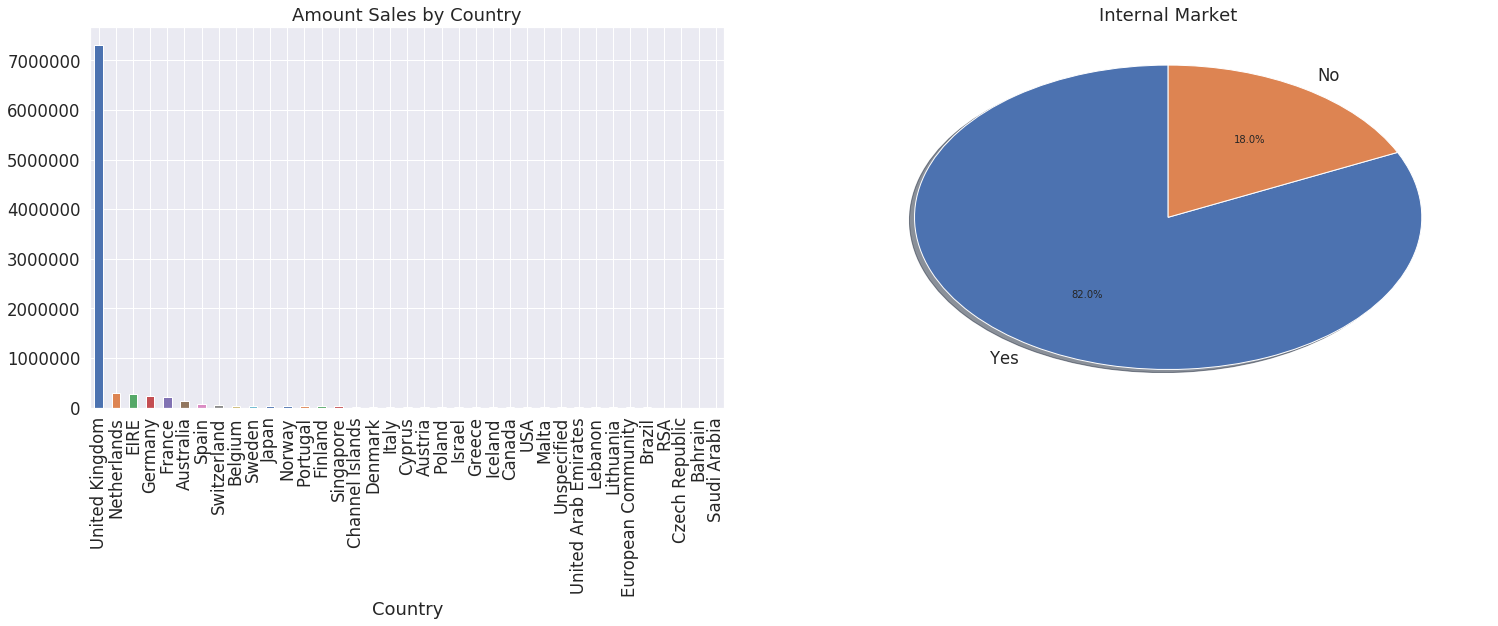

In [11]:
fig = plt.figure(figsize=(25, 7))
f1 = fig.add_subplot(121)
g = cs_df.groupby(["Country"]).amount.sum().sort_values(ascending = False).plot(kind='bar', title='Amount Sales by Country')
cs_df['Internal'] = cs_df.Country.apply(lambda x: 'Yes' if x=='United Kingdom' else 'No' )
f2 = fig.add_subplot(122)
market = cs_df.groupby(["Internal"]).amount.sum().sort_values(ascending = False)
g = plt.pie(market, labels=market.index, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Internal Market')
plt.show()

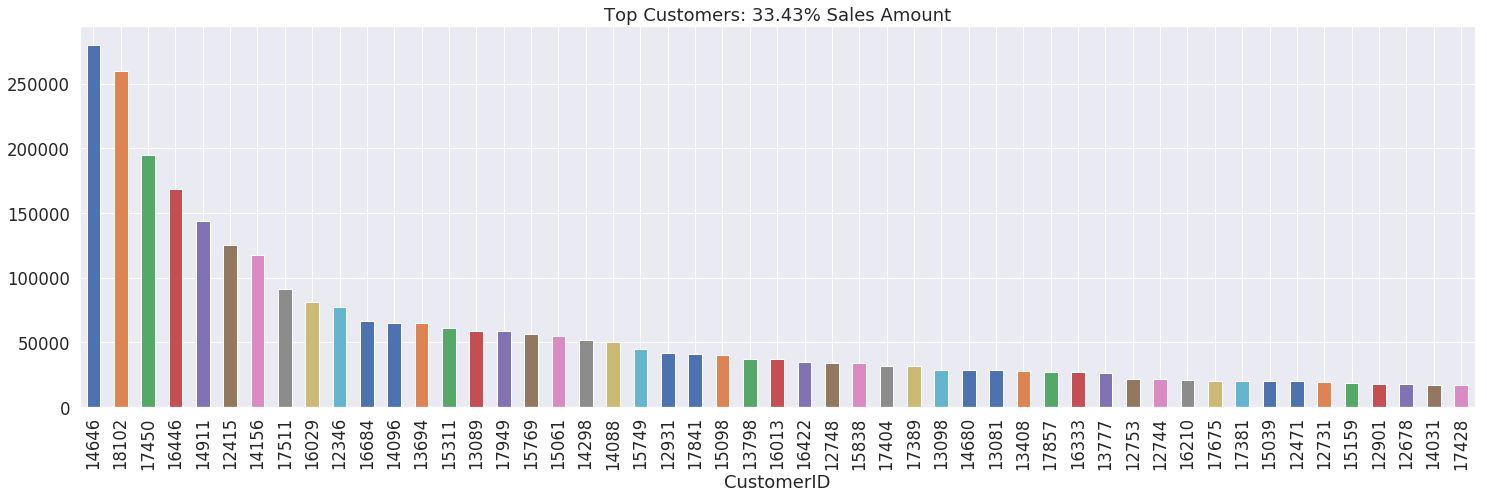

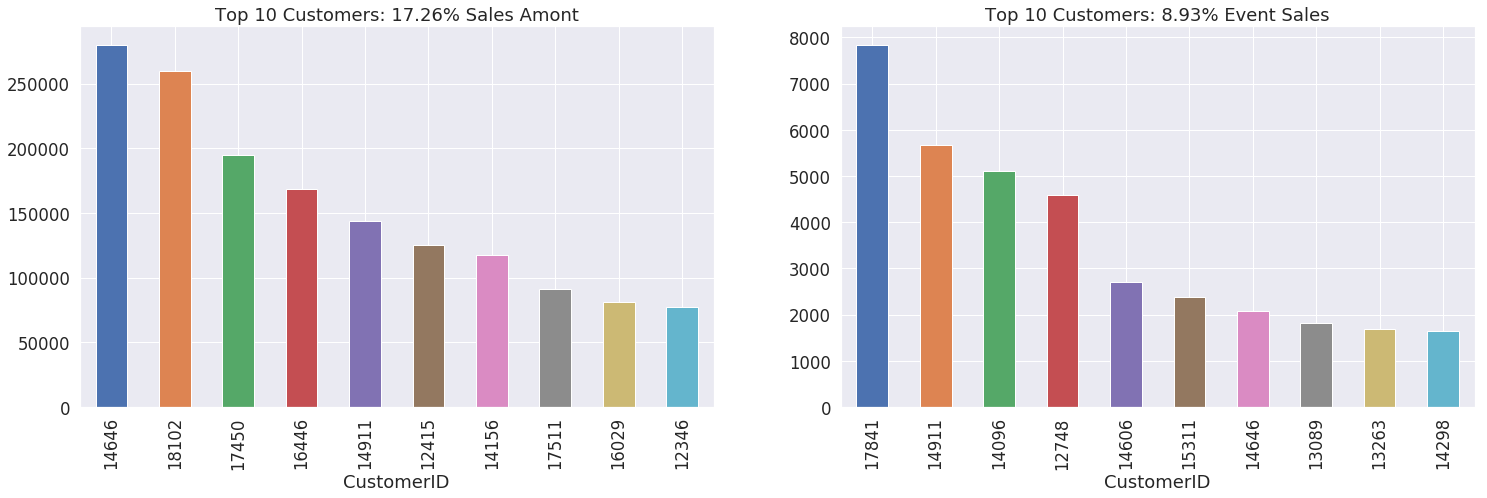

In [12]:
fig = plt.figure(figsize=(25, 7))
PercentSales =  np.round((cs_df.groupby(["CustomerID"]).amount.sum().\
                          sort_values(ascending = False)[:51].sum()/cs_df.groupby(["CustomerID"]).\
                          amount.sum().sort_values(ascending = False).sum()) * 100, 2)
g = cs_df.groupby(["CustomerID"]).amount.sum().sort_values(ascending = False)[:51].\
    plot(kind='bar', title='Top Customers: {:3.2f}% Sales Amount'.format(PercentSales))

fig = plt.figure(figsize=(25, 7))
f1 = fig.add_subplot(121)
PercentSales =  np.round((cs_df.groupby(["CustomerID"]).amount.sum().\
                          sort_values(ascending = False)[:10].sum()/cs_df.groupby(["CustomerID"]).\
                          amount.sum().sort_values(ascending = False).sum()) * 100, 2)
g = cs_df.groupby(["CustomerID"]).amount.sum().sort_values(ascending = False)[:10]\
    .plot(kind='bar', title='Top 10 Customers: {:3.2f}% Sales Amont'.format(PercentSales))
f1 = fig.add_subplot(122)
PercentSales =  np.round((cs_df.groupby(["CustomerID"]).amount.count().\
                          sort_values(ascending = False)[:10].sum()/cs_df.groupby(["CustomerID"]).\
                          amount.count().sort_values(ascending = False).sum()) * 100, 2)
g = cs_df.groupby(["CustomerID"]).amount.count().sort_values(ascending = False)[:10].\
    plot(kind='bar', title='Top 10 Customers: {:3.2f}% Event Sales'.format(PercentSales))

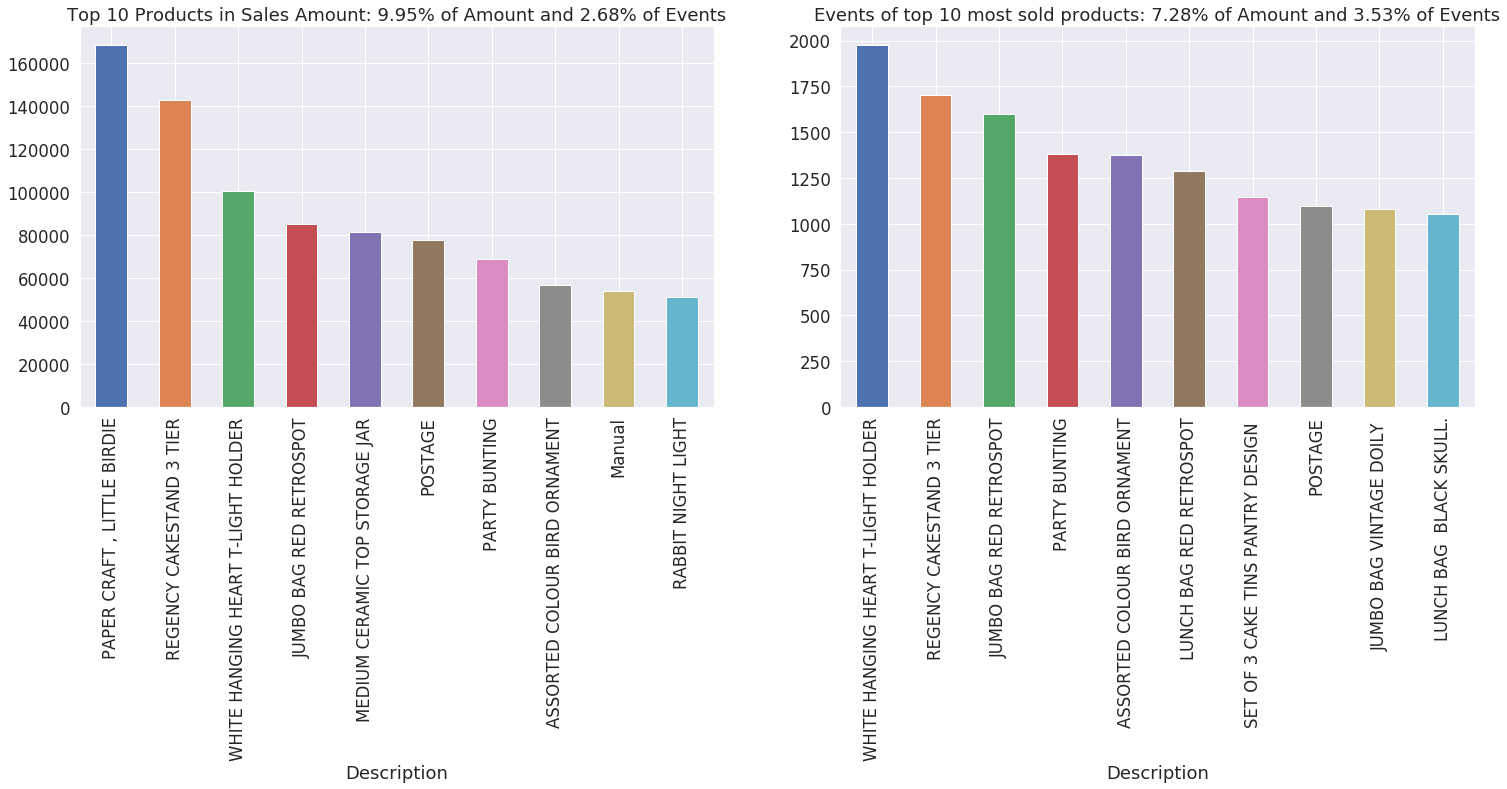

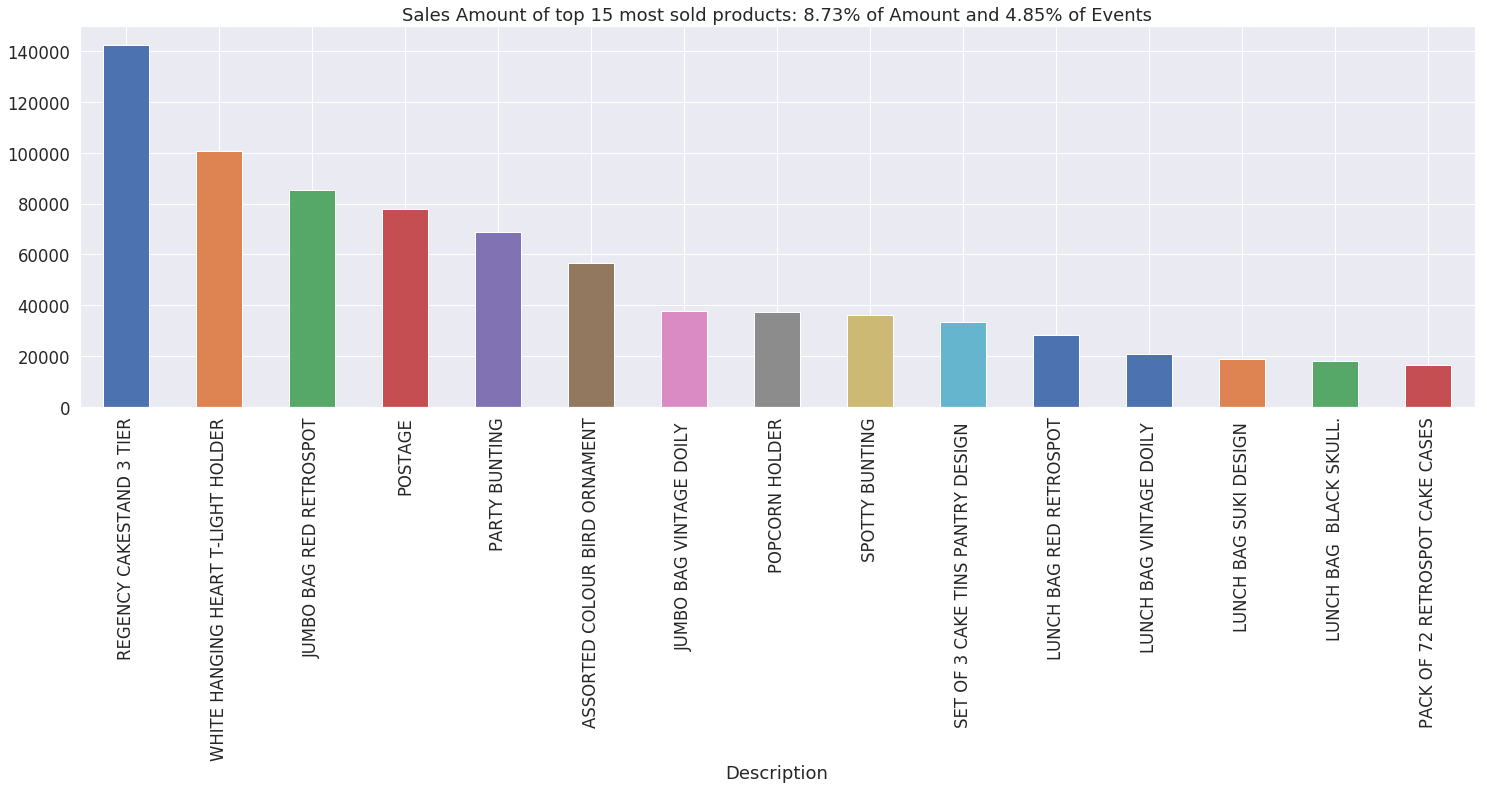

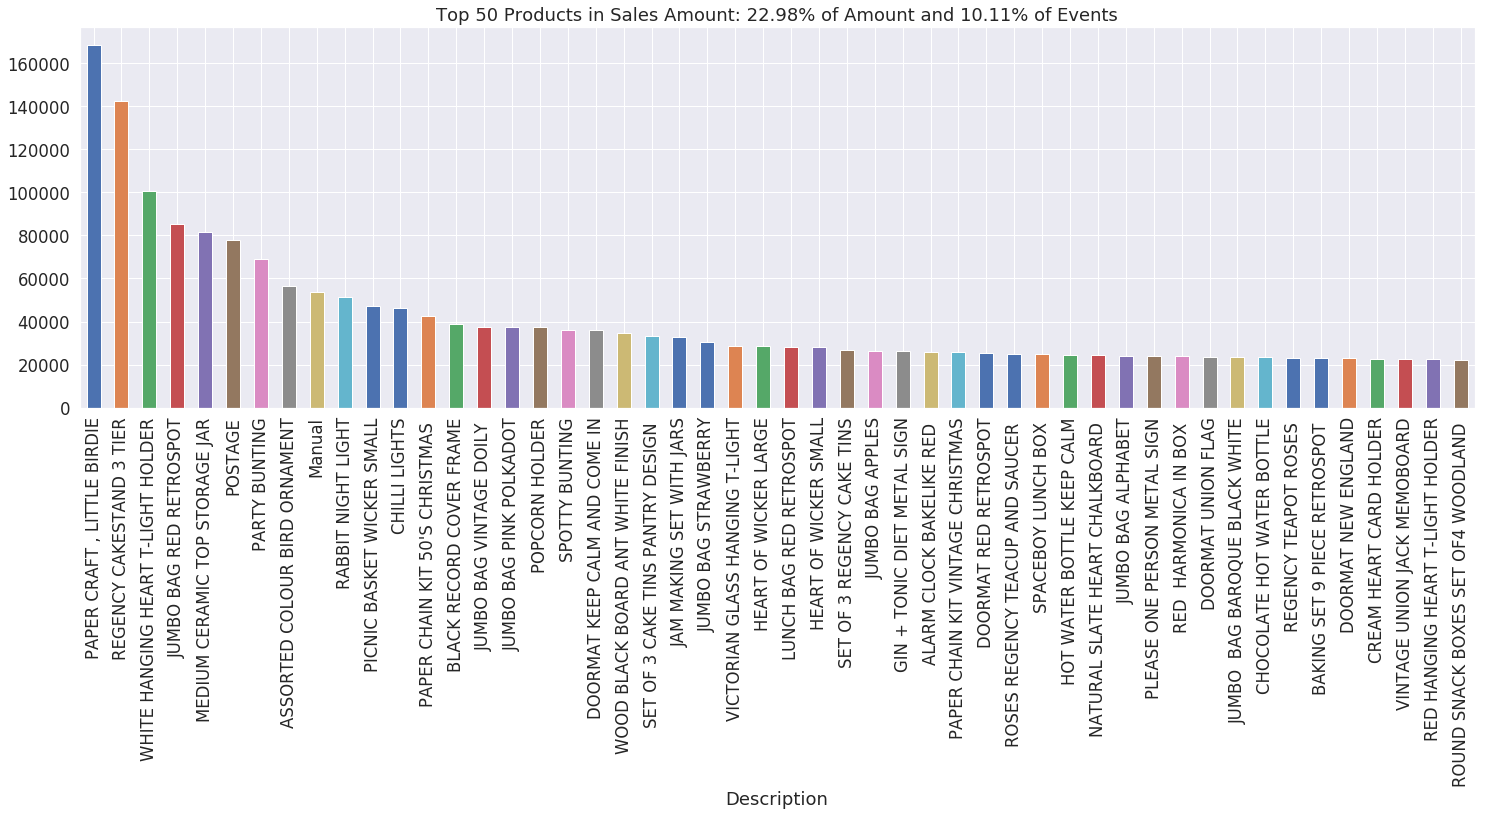

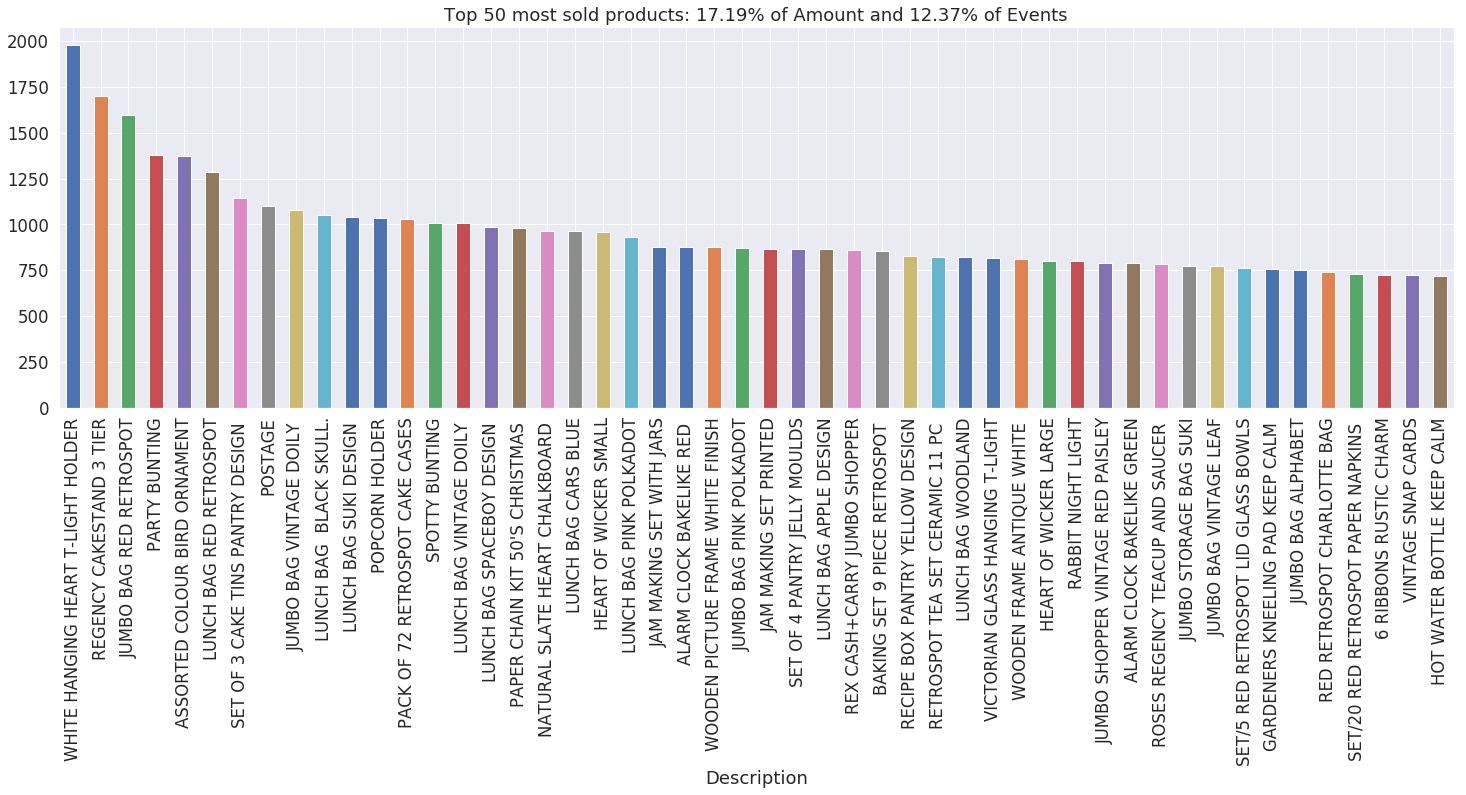

In [13]:
AmoutSum = cs_df.groupby(["Description"]).amount.sum().sort_values(ascending = False)
inv = cs_df[["Description", "InvoiceNo"]].groupby(["Description"]).InvoiceNo.unique().\
      agg(np.size).sort_values(ascending = False)

fig = plt.figure(figsize=(25, 7))
f1 = fig.add_subplot(121)
Top10 = list(AmoutSum[:10].index)
PercentSales =  np.round((AmoutSum[Top10].sum()/AmoutSum.sum()) * 100, 2)
PercentEvents = np.round((inv[Top10].sum()/inv.sum()) * 100, 2)
g = AmoutSum[Top10].\
    plot(kind='bar', title='Top 10 Products in Sales Amount: {:3.2f}% of Amount and {:3.2f}% of Events'.\
                       format(PercentSales, PercentEvents))

f1 = fig.add_subplot(122)
Top10Ev = list(inv[:10].index)
PercentSales =  np.round((AmoutSum[Top10Ev].sum()/AmoutSum.sum()) * 100, 2)
PercentEvents = np.round((inv[Top10Ev].sum()/inv.sum()) * 100, 2)
g = inv[Top10Ev].\
    plot(kind='bar', title='Events of top 10 most sold products: {:3.2f}% of Amount and {:3.2f}% of Events'.\
                       format(PercentSales, PercentEvents))


fig = plt.figure(figsize=(25, 7))
Top15ev = list(inv[:15].index)
PercentSales =  np.round((AmoutSum[Top15ev].sum()/AmoutSum.sum()) * 100, 2)
PercentEvents = np.round((inv[Top15ev].sum()/inv.sum()) * 100, 2)
g = AmoutSum[Top15ev].sort_values(ascending = False).\
    plot(kind='bar', 
         title='Sales Amount of top 15 most sold products: {:3.2f}% of Amount and {:3.2f}% of Events'.\
         format(PercentSales, PercentEvents))

fig = plt.figure(figsize=(25, 7))
Top50 = list(AmoutSum[:50].index)
PercentSales =  np.round((AmoutSum[Top50].sum()/AmoutSum.sum()) * 100, 2)
PercentEvents = np.round((inv[Top50].sum()/inv.sum()) * 100, 2)
g = AmoutSum[Top50].\
    plot(kind='bar', 
         title='Top 50 Products in Sales Amount: {:3.2f}% of Amount and {:3.2f}% of Events'.\
         format(PercentSales, PercentEvents))

fig = plt.figure(figsize=(25, 7))
Top50Ev = list(inv[:50].index)
PercentSales =  np.round((AmoutSum[Top50Ev].sum()/AmoutSum.sum()) * 100, 2)
PercentEvents = np.round((inv[Top50Ev].sum()/inv.sum()) * 100, 2)
g = inv[Top50Ev].\
    plot(kind='bar', title='Top 50 most sold products: {:3.2f}% of Amount and {:3.2f}% of Events'.\
                       format(PercentSales, PercentEvents))


## Customer Segmentation:
Customer segmentation is similarly the process of dividing an organization’s customer bases into different sections or segments based on various customer attributes.  The process of customer segmentation is based on the premise of finding differences among the customers’ behavior and patterns.

The major objectives and benefits behind the motivation for customer segmentation are:
* **Higher Revenue**: This is the most obvious requirement of any customer segmentation project. 
* **Customer Understanding**: One of the mostly widely accepted business paradigms is “know your customer” and a segmentation of the customer base allows for a perfect dissection of this paradigm. 
* **Target Marketing**:  The most visible reason for customer segmentation is the ability to focus marketing efforts effectively and efficiently. If a firm knows the different segments of its customer base, it can devise better marketing campaigns which are tailor made for the segment. A good segmentation model allows for better understanding of customer requirements and hence increases the chances of the success of any marketing campaign developed by the organization.
* **Optimal Product Placement**: A good customer segmentation strategy can also help the firm with developing or offering new products, or a bundle of products together as a combined offering.
* **Finding Latent Customer Segments**: Finding out which segment of customers it might be missing to identifying untapped customer segments by focused on marketing campaigns or new business development.

**Clustering**:

The most obvious method to perform customer segmentation is using unsupervised Machine Learning methods like clustering.  The method is as simple as collecting as much data about the customers as possible in the form of features or attributes and then finding out the different clusters that can be obtained from that data. Finally, we can find traits of customer segments by analyzing the characteristics of the clusters.

**Exploratory Data Analysis**:

Using exploratory data analysis is another way of finding out customer segments. This is usually done by analysts who have a good knowledge about the domain relevant to both products and customers. It can be done flexibly to include the top decision points in an analysis. 
 
### RFM Model for Customer Value:

Since our dataset is limited to the sales records, and didn´t include anothers information about our customers, we will use a **RFM**,***Recency, Frequency and Monetary Value**, based model of customer value for finding our customer segments.
 The RFM model will take the transactions of a customer and calculate three important informational attributes about each customer:
- **Recency**: The value of how recently a customer purchased at the establishment
- **Frequency**: How frequent the customer’s transactions are at the establishment
- **Monetary value**: The dollar (or pounds in our case) value of all the transactions that the customer made at the establishment

#### Recency
To create the recency feature variable, we need to decide the reference date for our analysis. Usually, we make use of the last transaction date plus one day. Then, we will construct the recency variable as the number of days before the reference date when a customer last made a purchase.

In [14]:
refrence_date = cs_df.InvoiceDate.max() + datetime.timedelta(days = 1)
print('Reference Date:', refrence_date)
cs_df['days_since_last_purchase'] = (refrence_date - cs_df.InvoiceDate).astype('timedelta64[D]')
customer_history_df =  cs_df[['CustomerID', 'days_since_last_purchase']].groupby("CustomerID").min().reset_index()
customer_history_df.rename(columns={'days_since_last_purchase':'recency'}, inplace=True)
customer_history_df.describe().transpose()

Reference Date: 2011-12-10 12:50:00


count          mean   ...          75%      max
CustomerID  4338.0  15300.408022   ...     16778.75  18287.0
recency     4338.0     92.536422   ...       142.00    374.0

[2 rows x 8 columns]

We will plot the Recency Distribution and QQ-plot to identify substantive departures from normality, likes outliers, skewness and kurtosis.

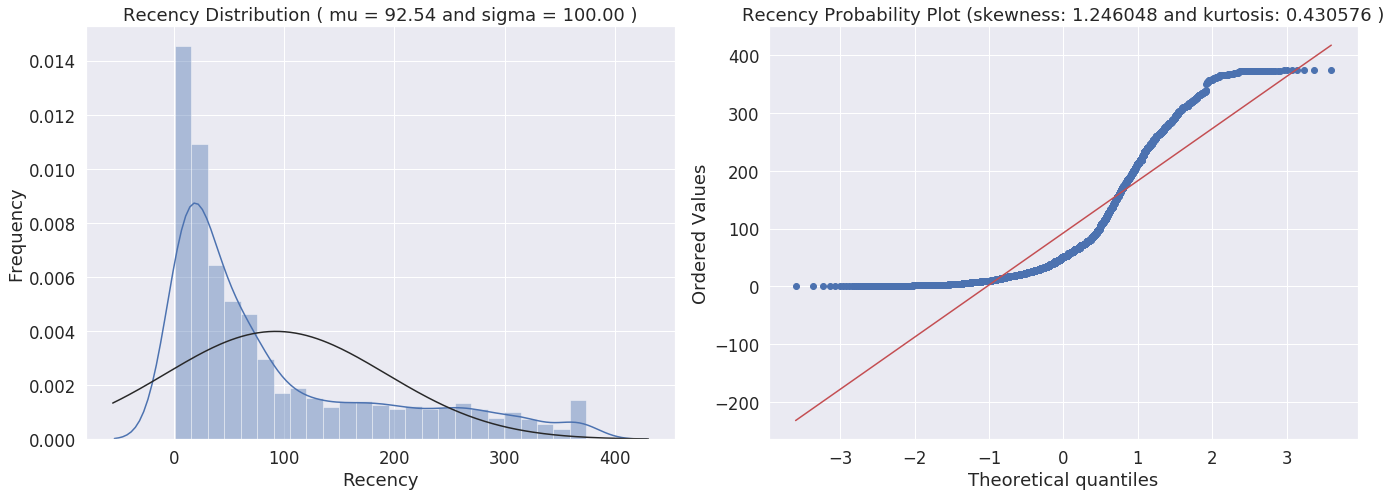

In [15]:
def QQ_plot(data, measure):
    fig = plt.figure(figsize=(20,7))

    #Get the fitted parameters used by the function
    (mu, sigma) = norm.fit(data)

    #Kernel Density plot
    fig1 = fig.add_subplot(121)
    sns.distplot(data, fit=norm)
    fig1.set_title(measure + ' Distribution ( mu = {:.2f} and sigma = {:.2f} )'.format(mu, sigma), loc='center')
    fig1.set_xlabel(measure)
    fig1.set_ylabel('Frequency')

    #QQ plot
    fig2 = fig.add_subplot(122)
    res = probplot(data, plot=fig2)
    fig2.set_title(measure + ' Probability Plot (skewness: {:.6f} and kurtosis: {:.6f} )'.format(data.skew(), data.kurt()), loc='center')

    plt.tight_layout()
    plt.show()

QQ_plot(customer_history_df.recency, 'Recency')

From the first graph above we can see that sales recency distribution is ***skewed***, has a **peak** on the left and a long tail to the right. It **deviates from normal distribution** and is **positively biased**.

From the **Probability Plot**, we could see that **sales recency** also does **not align with the diagonal  <span style="color:red">red line</span>** which represent normal distribution. The form of its distribution confirm that is a skewed right. 

With ***skewness positive of 1.25***, we confirm the **lack of symmetry** and indicate that sales recency  are **skewed right**, as we can see too at the Sales Distribution plot, skewed right means that the right tail is **long relative to the left tail**. The skewness for a normal distribution is zero, and any symmetric data should have a skewness near zero. A distribution, or data set, is symmetric if it looks the same to the left and right of the center point.

**Kurtosis** is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution. That is, data sets with high kurtosis tend to have heavy tails, or outliers, and **positive** kurtosis indicates a **heavy-tailed distribution** and **negative** kurtosis indicates a **light tailed distribution**. So, with 0.43 of positive kurtosis **sales recency** are heavy-tailed and has some **outliers**.

#### Frequency

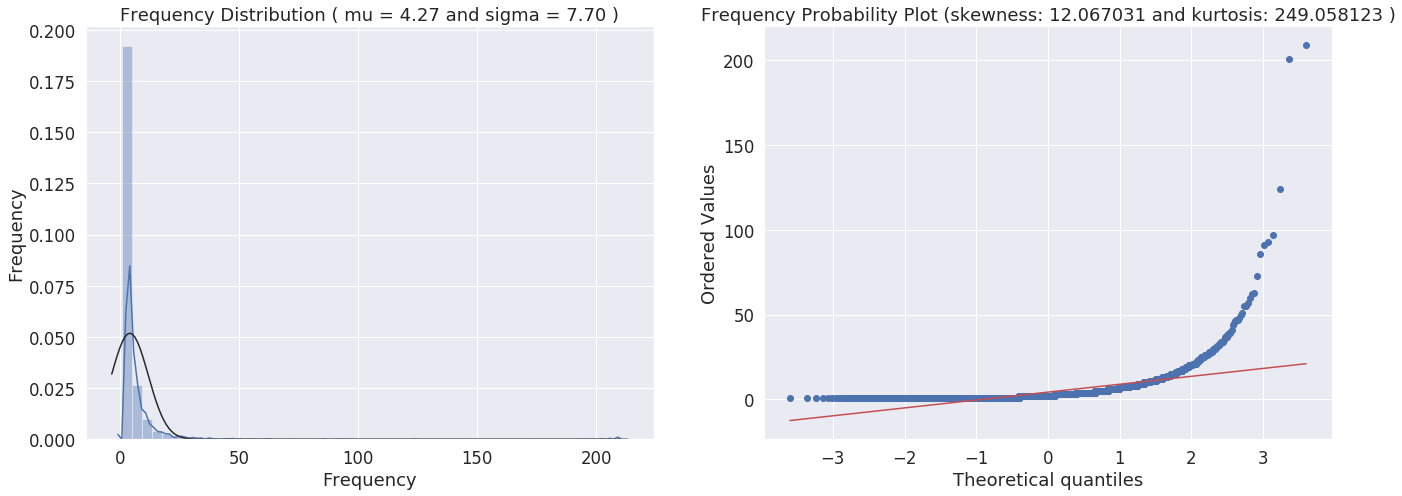

In [16]:
customer_freq = (cs_df[['CustomerID', 'InvoiceNo']].groupby(["CustomerID", 'InvoiceNo']).count().reset_index()).\
                groupby(["CustomerID"]).count().reset_index()
customer_freq.rename(columns={'InvoiceNo':'frequency'},inplace=True)
customer_history_df = customer_history_df.merge(customer_freq)
QQ_plot(customer_history_df.frequency, 'Frequency')

From the first graph above we can see that sales frequency distribution is ***skewed***, has a **peak** on the left and a long tail to the right. It **deviates from normal distribution** and is **positively biased**.

From the **Probability Plot**, we could see that **sales frequency** also does **not align with the diagonal and confirm that is a skewed right. 

With ***skewness positive of 12.1***, we confirm the **high lack of symmetry** and with 249 **Kurtosis** indicates that is a **heavy-tailed distribution** and has **outliers**.

#### Monetary Value

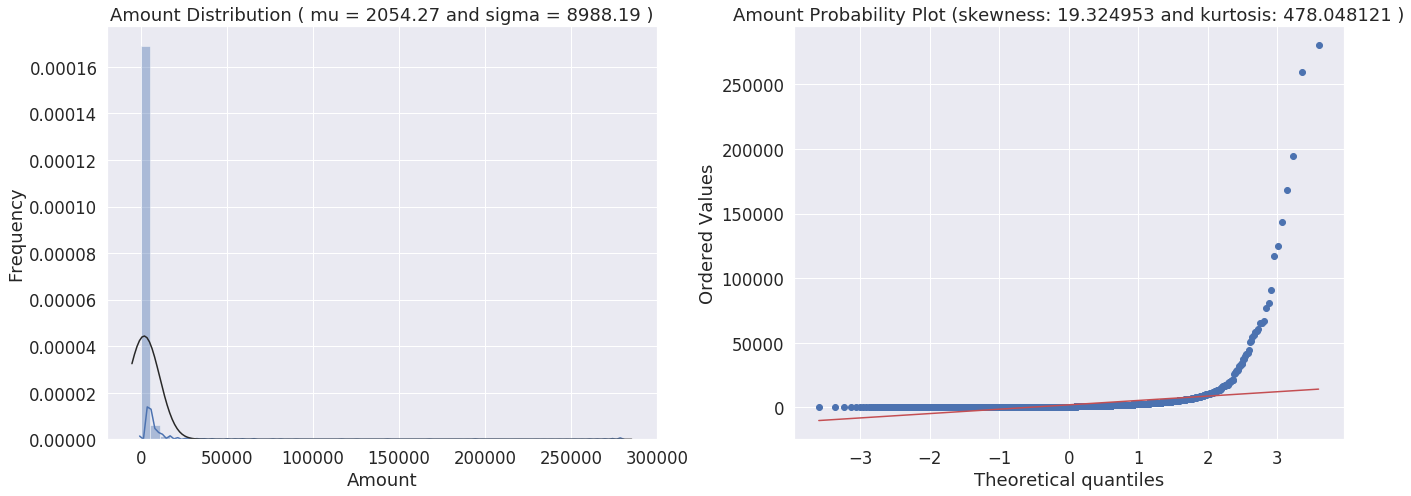

In [17]:
customer_monetary_val = cs_df[['CustomerID', 'amount']].groupby("CustomerID").sum().reset_index()
customer_history_df = customer_history_df.merge(customer_monetary_val)
QQ_plot(customer_history_df.amount, 'Amount')

From the first graph above we can see that sales amount distribution is ***skewed***, has a **peak** on the left and a long tail to the right. It **deviates from normal distribution** and is **positively biased**.

From the **Probability Plot**, we could see that **sales amount** also does **not align with the diagonal**, special on the right. 

With ***skewness positive of 19.3***, we confirm the **high lack of symmetry** and with 478 **Kurtosis** indicates that is a **too heavy-tailed distribution** and has **outliers**, surely more than 10 very extreme.

Let's see a statistical summary of this dataset:

In [18]:
customer_history_df.describe()

CustomerID      recency    frequency         amount
count   4338.000000  4338.000000  4338.000000    4338.000000
mean   15300.408022    92.536422     4.272015    2054.266460
std     1721.808492   100.014169     7.697998    8989.230441
min    12346.000000     1.000000     1.000000       3.750000
25%    13813.250000    18.000000     1.000000     307.415000
50%    15299.500000    51.000000     2.000000     674.485000
75%    16778.750000   142.000000     5.000000    1661.740000
max    18287.000000   374.000000   209.000000  280206.020000

### Data Preprocessing
Once we have created our customer value dataset, we will perform some preprocessing on the data. For our clustering, we will be using the K-means clustering algorithm. One of the requirements for proper functioning of the algorithm is the mean centering of the variable values. Mean centering of a variable value means that we will replace the actual value of the variable with a standardized value, so that the variable has a mean of 0 and variance of 1. This ensures that all the variables are in the same range and the difference in ranges of values doesn't cause the algorithm to not perform well. This is akin to feature scaling.

Another problem that you can investigate about is the huge range of values each variable can take. This
problem is particularly noticeable for the monetary amount variable. To take care of this problem, we will transform all the variables on the log scale. This transformation, along with the standardization, will ensure that the input to our algorithm is a homogenous set of scaled and transformed values.

An important point about the data preprocessing step is that sometimes we need it to be reversible. In our case, we will have the clustering results in terms of the log transformed and scaled variable. But to make inferences in terms of the original data, we will need to reverse transform all the variable so that we get back the actual RFM figures. This can be done by using the preprocessing capabilities of Python.

In [19]:
customer_history_df['recency_log'] = customer_history_df['recency'].apply(math.log)
customer_history_df['frequency_log'] = customer_history_df['frequency'].apply(math.log)
customer_history_df['amount_log'] = customer_history_df['amount'].apply(math.log)
feature_vector = ['amount_log', 'recency_log','frequency_log']
X_subset = customer_history_df[feature_vector] #.as_matrix()
scaler = preprocessing.StandardScaler().fit(X_subset)
X_scaled = scaler.transform(X_subset)
pd.DataFrame(X_scaled, columns=X_subset.columns).describe().T

count          mean    ...          75%       max
amount_log     4338.0 -1.202102e-16    ...     0.654244  4.721395
recency_log    4338.0 -1.027980e-16    ...     0.829652  1.505796
frequency_log  4338.0 -2.355833e-16    ...     0.738267  4.882714

[3 rows x 8 columns]

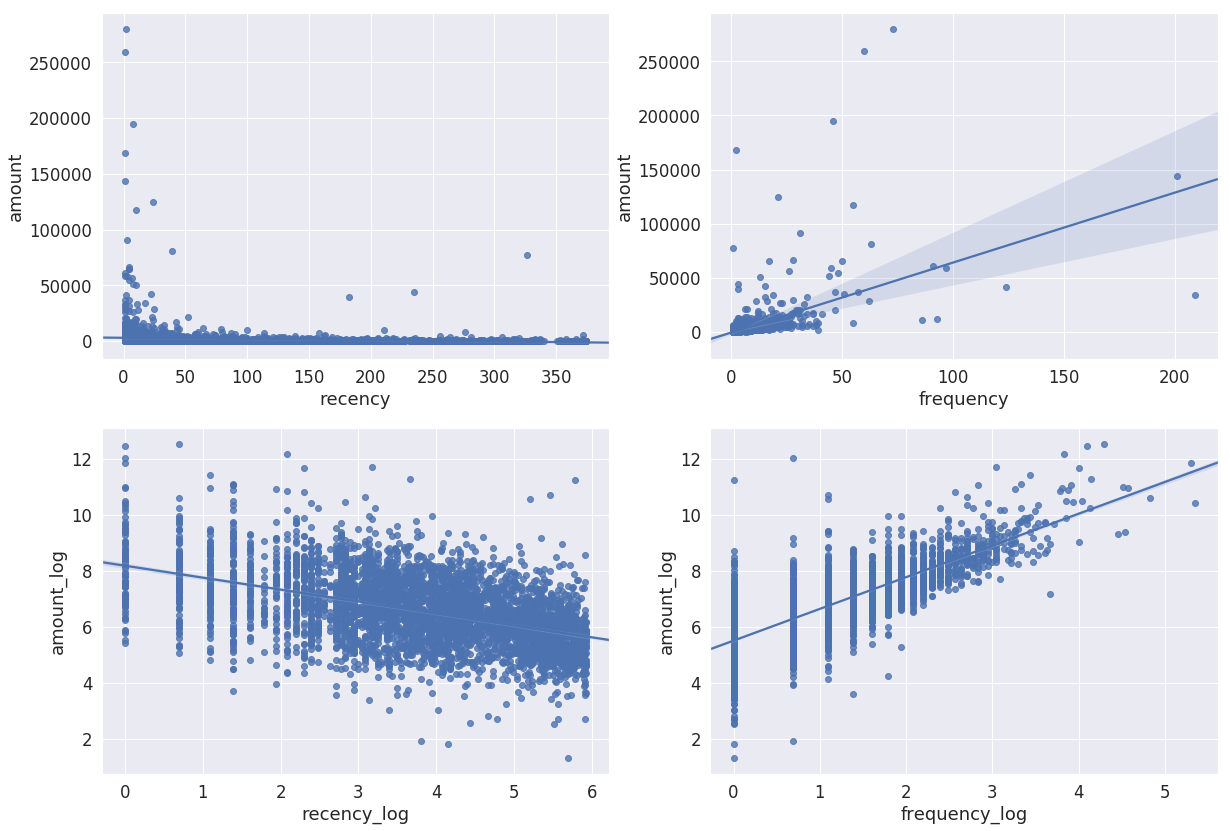

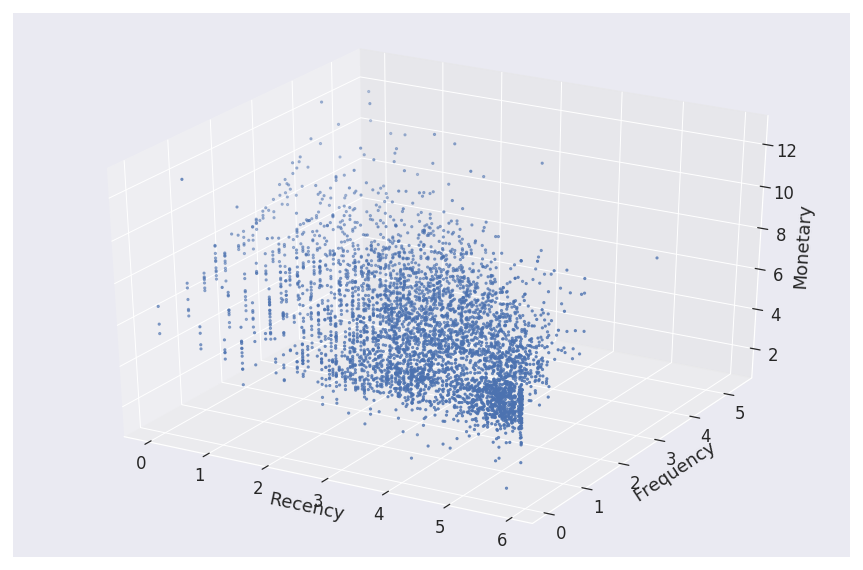

In [20]:
fig = plt.figure(figsize=(20,14))
f1 = fig.add_subplot(221); sns.regplot(x='recency', y='amount', data=customer_history_df)
f1 = fig.add_subplot(222); sns.regplot(x='frequency', y='amount', data=customer_history_df)
f1 = fig.add_subplot(223); sns.regplot(x='recency_log', y='amount_log', data=customer_history_df)
f1 = fig.add_subplot(224); sns.regplot(x='frequency_log', y='amount_log', data=customer_history_df)

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

xs =customer_history_df.recency_log
ys = customer_history_df.frequency_log
zs = customer_history_df.amount_log
ax.scatter(xs, ys, zs, s=5)

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

plt.show()

The obvious patterns we can see from the plots above is that costumers who buy with a higher frequency and more recency tend to spend more based on the increasing trend in Monetary (amount value) with a corresponding increasing and decreasing trend for Frequency and Recency, respectively. 

### Clustering for Segments
#### K-Means Clustering
The K-means clustering belongs to the partition based\centroid based hard clustering family of algorithms, a family of algorithms where each sample in a dataset is assigned to exactly one cluster.

Based on this Euclidean distance metric, we can describe the k-means algorithm as a simple optimization problem, an iterative approach for minimizing the within-cluster sum of squared errors (SSE), which is sometimes also called cluster inertia. So, the objective of K-Means clustering is to minimize total intra-cluster variance, or, the squared error function: 
![image](https://www.saedsayad.com/images/Clustering_kmeans_c.png)

The steps that happen in the K-means algorithm for partitioning the data are as given follows:
1. The algorithm starts with random point initializations of the required number of centers. The “K” in K-means stands for the number of clusters.
2. In the next step, each of the data point is assigned to the center closest to it. The distance metric used in K-means clustering is normal Euclidian distance.
3. Once the data points are assigned, the centers are recalculated by averaging the dimensions of the points belonging to the cluster.
4. The process is repeated with new centers until we reach a point where the assignments become stable. In this case, the algorithm terminates.

##### K-means++
- Place the initial centroids far away from each other via the k-means++ algorithm, which leads to better and more consistent results than the classic k-means.
- To use k-means++ with scikit-learn's KMeans object, we just need to set the init parameter to k-means++ (the default setting) instead of random.

#### The Elbow Method
  
Using the elbow method to find the optimal number of clusters. The idea behind the elbow method is to identify the value of k where the distortion begins to increase most rapidly. If k increases, the distortion will decrease, because the samples will be closer to the centroids they are assigned to. 

This method looks at the percentage of variance explained as a function of the number of clusters. More precisely, if one plots the percentage of variance explained by the clusters against the number of clusters, the first clusters will add much information (explain a lot of variance), but at some point the marginal gain will drop, giving an angle in the graph. The number of clusters is chosen at this point, hence the "elbow criterion". This "elbow" cannot always be unambiguously identified.Percentage of variance explained is the ratio of the between-group variance to the total variance, also known as an F-test. A slight variation of this method plots the curvature of the within group variance.

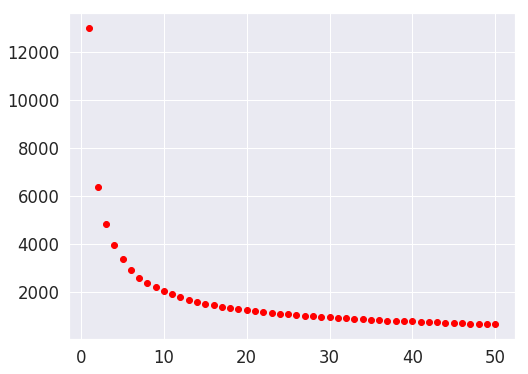

The best K sugest:  7


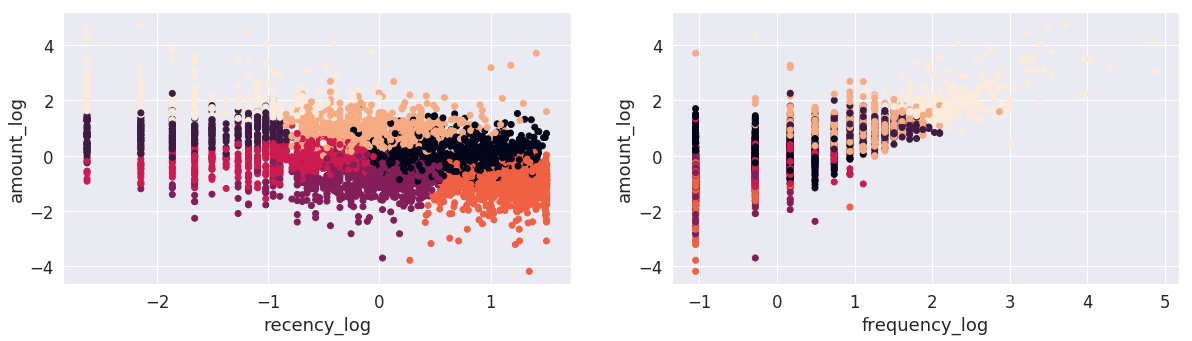

In [21]:
cl = 50
corte = 0.1

anterior = 100000000000000
cost = [] 
K_best = cl

for k in range (1, cl+1):
    # Create a kmeans model on our data, using k clusters.  random_state helps ensure that the algorithm returns the same results each time.
    model = KMeans(
        n_clusters=k, 
        init='k-means++', #'random',
        n_init=10,
        max_iter=300,
        tol=1e-04,
        random_state=101)

    model = model.fit(X_scaled)

    # These are our fitted labels for clusters -- the first cluster has label 0, and the second has label 1.
    labels = model.labels_
 
    # Sum of distances of samples to their closest cluster center
    interia = model.inertia_
    if (K_best == cl) and (((anterior - interia)/anterior) < corte): K_best = k - 1
    cost.append(interia)
    anterior = interia

plt.figure(figsize=(8, 6))
plt.scatter(range (1, cl+1), cost, c='red')
plt.show()

# Create a kmeans model with the best K.
print('The best K sugest: ',K_best)
model = KMeans(n_clusters=K_best, init='k-means++', n_init=10,max_iter=300, tol=1e-04, random_state=101)

# Note I'm scaling the data to normalize it! Important for good results.
model = model.fit(X_scaled)

# These are our fitted labels for clusters -- the first cluster has label 0, and the second has label 1.
labels = model.labels_

# And we'll visualize it:
#plt.scatter(X_scaled[:,0], X_scaled[:,1], c=model.labels_.astype(float))
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(121)
plt.scatter(x = X_scaled[:,1], y = X_scaled[:,0], c=model.labels_.astype(float))
ax.set_xlabel(feature_vector[1])
ax.set_ylabel(feature_vector[0])
ax = fig.add_subplot(122)
plt.scatter(x = X_scaled[:,2], y = X_scaled[:,0], c=model.labels_.astype(float))
ax.set_xlabel(feature_vector[2])
ax.set_ylabel(feature_vector[0])

plt.show()

Note that by the Elbow method from a K equal to 3 we already observed low rates of gain in the decay of the distortions with the decrease of K reaching the limit of 10% with the K equal to 7. With this in mind, we will begin to evaluate the options more deeply with 3, and 7, starting with the silhouette analysis.

#### Silhouette analysis on K-Means clustering

Silhouette analysis can be used to study the separation distance between the resulting clusters, as a strategy to quantifying the quality of clustering via graphical tool to plot a measure of how tightly grouped the samples in the clusters are. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. 

It can also be applied to clustering algorithms other than k-means

Silhouette coefficients has a range of \[-1, 1\], it calculated by:
1. Calculate the cluster cohesion a( i )as the average distance between a sample x( i )   and all other points in the same cluster.
2. Calculate the cluster separation b( i ) from the next closest cluster as the average distance between the sample x( i ) and all samples in the nearest cluster.
3. Calculate the silhouette s( i )  as the difference between cluster cohesion and separation divided by the greater of the two, as shown here:
![image](https://wikimedia.org/api/rest_v1/media/math/render/svg/3d80ab22fb291b347b2d9dc3cc7cd614f6b15479)
Which can be also written as:
![image](https://wikimedia.org/api/rest_v1/media/math/render/svg/ab5579a6c7150579af8a0d432b6630ba529376f0)

Where:
- If near +1, it indicate that the sample is far away from the neighboring clusters. 
- a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. 
- If most objects have a high value, then the clustering configuration is appropriate. 
- If many points have a low or negative value, then the clustering configuration may have too many or too few clusters.
- A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters
- Negative values indicate that those samples might have been assigned to the wrong cluster.

The silhouette plot can shows a bad K clusters pick for the given data due to the presence of clusters with below average silhouette scores and also due to wide fluctuations in the size of the silhouette plots. A good k clusters can found when all the plots are more or less of similar thickness and hence are of similar sizes.

Although we have to keep in mind that in several cases and scenarios, sometimes we may have to drop the mathematical explanation given by the algorithm and look at the business relevance of the results obtained.

Let's see below how our data perform for each K clusters groups (3, 5 and 7) in the silhouette score of each cluster, along with the center of each of the cluster discovered in the scatter plots, by amount_log vs recency_log and vs frequency_log.

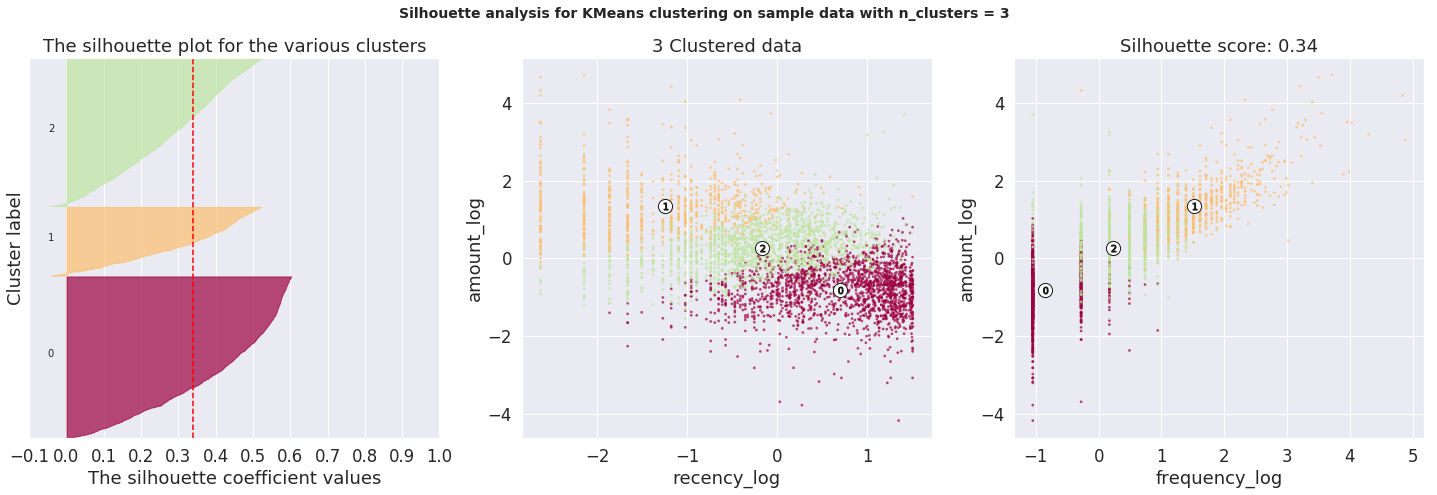

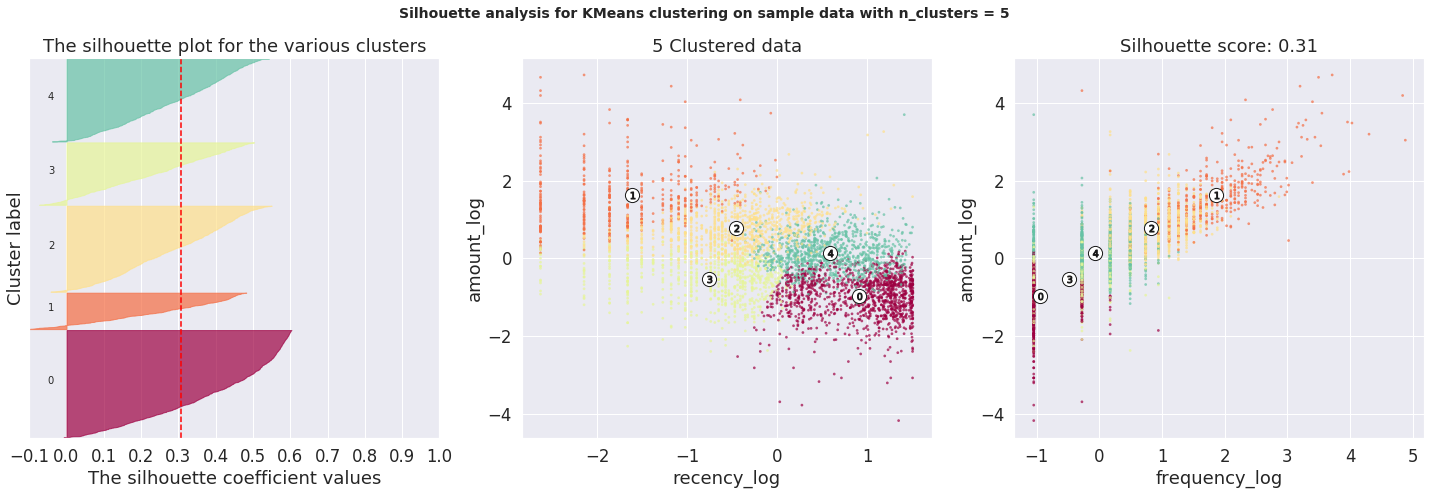

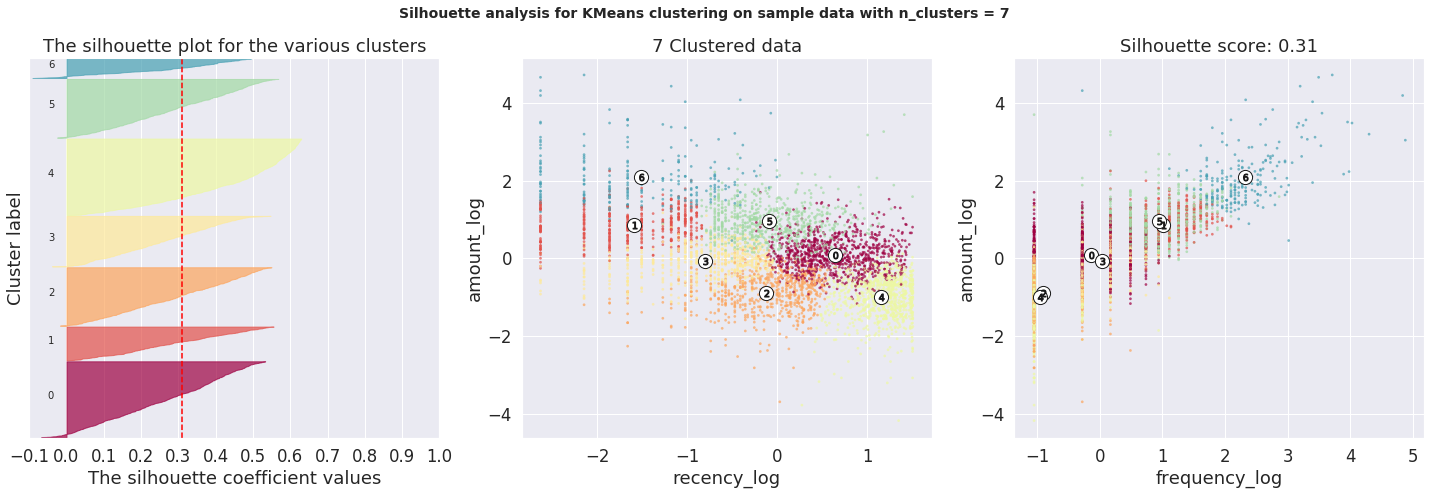

In [22]:
cluster_centers = dict()

for n_clusters in range(3,K_best+1,2):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
    fig.set_size_inches(25, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X_scaled) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10,max_iter=300, tol=1e-04, random_state=101)
    cluster_labels = clusterer.fit_predict(X_scaled)

    silhouette_avg = silhouette_score(X = X_scaled, labels = cluster_labels)
    cluster_centers.update({n_clusters :{'cluster_center':clusterer.cluster_centers_,
                                         'silhouette_score':silhouette_avg,
                                         'labels':cluster_labels}
                           })

    sample_silhouette_values = silhouette_samples(X = X_scaled, labels = cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.Spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
    colors = cm.Spectral(cluster_labels.astype(float) / n_clusters)
    
    centers = clusterer.cluster_centers_
    y = 0
    x = 1
    ax2.scatter(X_scaled[:, x], X_scaled[:, y], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')   
    ax2.scatter(centers[:, x], centers[:, y], marker='o', c="white", alpha=1, s=200, edgecolor='k')
    for i, c in enumerate(centers):
        ax2.scatter(c[x], c[y], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')
    ax2.set_title("{} Clustered data".format(n_clusters))
    ax2.set_xlabel(feature_vector[x])
    ax2.set_ylabel(feature_vector[y])

    x = 2
    ax3.scatter(X_scaled[:, x], X_scaled[:, y], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')   
    ax3.scatter(centers[:, x], centers[:, y], marker='o', c="white", alpha=1, s=200, edgecolor='k')
    for i, c in enumerate(centers):
        ax3.scatter(c[x], c[y], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')
    ax3.set_title("Silhouette score: {:1.2f}".format(cluster_centers[n_clusters]['silhouette_score']))
    ax3.set_xlabel(feature_vector[x])
    ax3.set_ylabel(feature_vector[y])
    
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    plt.show()

When we look at the results of the clustering process, we can infer some interesting insights:

- First notice that all K clusters options is valid, because they don't have presence of clusters with below average silhouette scores. 
- In the other hand, all options had a some wide fluctuations in the size of the silhouette plots. 

So, the best choice may lie on the option that gives us a simpler business explanation and at the same time target customers in focus groups with sizes closer to the desired. 


#### Conclusion

As we have seen, the generation of rules is a very simple process, but very computationally expensive, since it grows exponentially with the increase of the set of items.

Overall, we seek the proper balance between support and confidence leading to a reasonable number of strong rules. 

In the other hand, if the goal is to identify rare but with high confidence patterns, we should proceed as previously, by establishing a low level of support and a higher level of confidence, which leads to a large number of rules.

With this in mind, the rules with low support and high confidence would then be our target for further study and than outlining of strategies to raise cross selling.